In [62]:
#https://www.youtube.com/watch?v=XZ3PNnA9NbU
import numpy as np
import cv2
import matplotlib.pyplot as plt

print(cv2.__version__)

4.8.0


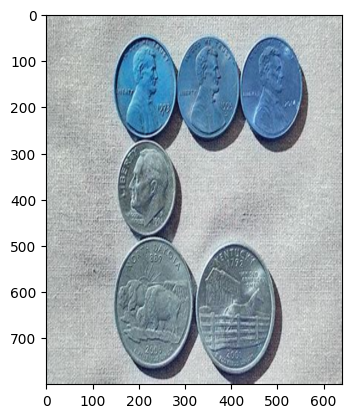

In [63]:
image = cv2.imread('Coins/6 coins.jfif')
image = cv2.resize(image,(640,800))
image_copy = image.copy()
#plt.imshow(image, cmap="gray")     #Dont know why cmap="gray"
plt.imshow(image)


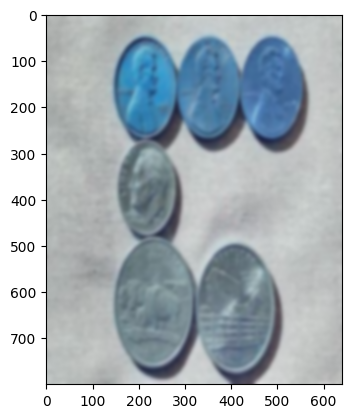

In [64]:
#blur = cv2.GaussianBlur(image,(7,7),3)
blur = cv2.GaussianBlur(image,(25,25),0)
plt.imshow(blur)

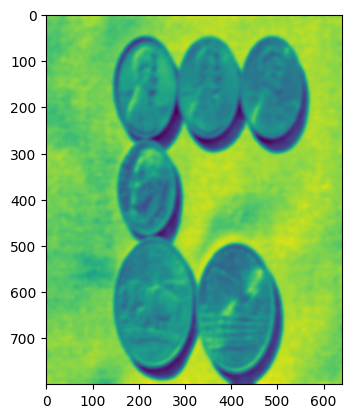

In [65]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

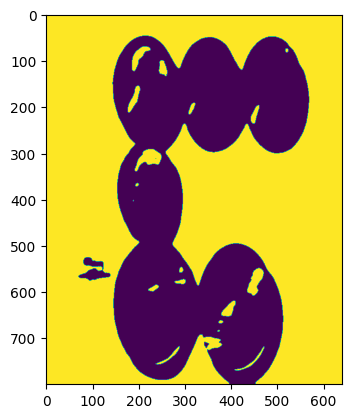

In [73]:
ret, thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY)
#thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [71]:
#didn't work

#contours , = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#image_contours = cv2.drawContours(image_copy, contours, -1, (0,255,0), 3)
#plt.imshow(image_contours)



ValueError: too many values to unpack (expected 1)

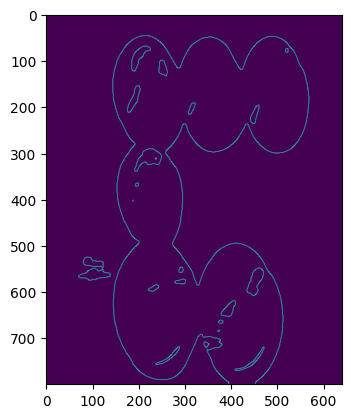

In [76]:
canny = cv2.Canny(thresh, 30, 150, 3)
#plt.imshow(canny, cmap="gray")
plt.imshow(canny)

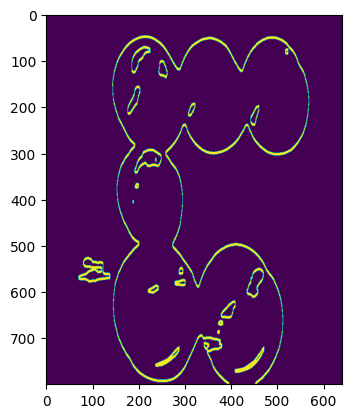

In [81]:
dilated = cv2.dilate(canny, (10,10), iterations = 5)
plt.imshow(dilated)

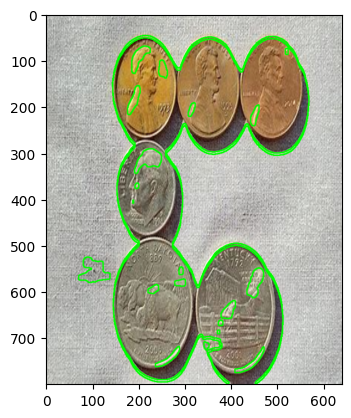

In [90]:
(contours, heirachy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)       #works
#(contours, heirachy) = cv2.findContours(dilated.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)          #found 57 coins
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    #converting bgr to rgb
cv2.drawContours(rgb, contours, -1, (0,255,0), 2)    #draws contours on rgb

plt.imshow(rgb)

In [92]:
print("coins in image: ", len(contours))
#Almost worked, counted 20 coins out of 6.

coins in image:  20


In [94]:
area = {}

for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar

print(area)

{0: 680.5, 1: 591.5, 2: 37.0, 3: 101.5, 4: 735.5, 5: 300.5, 6: 287.5, 7: 1386.0, 8: 128.0, 9: 2175.0, 10: 10.5, 11: 80.0, 12: 1713.0, 13: 466.5, 14: 269.0, 15: 790.0, 16: 532.0, 17: 73.5, 18: 1082.5, 19: 8614.0}


In [95]:
sorted_area = sorted(area.items(), key = lambda x :x[1], reverse=True)
results = np.array(sorted_area).astype("int")
print(results)

[[  19 8614]
 [   9 2175]
 [  12 1713]
 [   7 1386]
 [  18 1082]
 [  15  790]
 [   4  735]
 [   0  680]
 [   1  591]
 [  16  532]
 [  13  466]
 [   5  300]
 [   6  287]
 [  14  269]
 [   8  128]
 [   3  101]
 [  11   80]
 [  17   73]
 [   2   37]
 [  10   10]]


In [97]:
num = np.argwhere(results[:,1]>500).shape[0]        #disapearing everything smaller than 500
print(num)

10


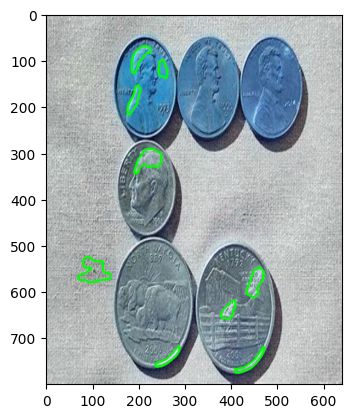

In [99]:
for i in range(1,num):
    image_copy = cv2.drawContours(image_copy, contours, results[i,0], (0,255,0), 3)

plt.imshow(image_copy)